|<h2>Course:</h2>|<h1><a href="https://udemy.com/course/dullms_x/?couponCode=202508" target="_blank">A deep understanding of AI language model mechanisms</a></h1>|
|-|:-:|
|<h2>Part 1:</h2>|<h1>Tokenizations and embeddings<h1>|
|<h2>Section:</h2>|<h1>Words to tokens to numbers<h1>|
|<h2>Lecture:</h2>|<h1><b>CodeChallenge HELPER: Token count by subword length<b></h1>|

<br>

<h5><b>Teacher:</b> Mike X Cohen, <a href="https://sincxpress.com" target="_blank">sincxpress.com</a></h5>
<h5><b>Course URL:</b> <a href="https://udemy.com/course/dullms_x/?couponCode=202508" target="_blank">udemy.com/course/dullms_x/?couponCode=202508</a></h5>
<i>Using the code without the course may lead to confusion or errors.</i>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

!pip install tiktoken
import tiktoken

%pip install pandas
import pandas as pd



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


In [4]:
# GPT-4's tokenizer
tokenizer = tiktoken.get_encoding('cl100k_base')

# Exercise 1: Token count by word length

In [25]:
import requests
import re
text = requests.get('https://www.gutenberg.org/files/35/35-0.txt').text
tmTokens = tokenizer.encode(text) 

In [6]:
# split by punctuation
words = re.split(r'([,.:;—?_!"“()\']|--|\s)',text)
words = [item.strip() for item in words if item.strip()]

tokenCount = np.zeros((len(words),2))

for idx,w in enumerate(words):
  tokenCount[idx,0] = len(w) # first column is the length of the word
  tokenCount[idx,1] = len(tokenizer.encode(w)) # second column is the number of tokens

df = pd.DataFrame(tokenCount, columns=['word_length', 'token_count'])
print(tokenCount.shape)
df.head()




(37786, 2)


word_length  token_count
0          3.0          1.0
1          5.0          1.0
2          2.0          1.0
3          3.0          1.0
4          7.0          1.0

In [7]:
plt.figure(figsize=(12,4))

offsetsX = np.random.randn(len(words))/20 # appropriately scaled random scatter
offsetsY = np.random.randn(len(words))/20

plt.plot(tokenCount[:,0]+offsetsX,tokenCount[:,1]+offsetsY,'k.',alpha=.5)
plt.gca().set(xlabel='Word lengths',ylabel='Encoded token count',xticks=np.arange(0,20,1))
plt.grid()

plt.show()

# Exercise 2: Encoding of 14-character words

In [8]:
# find words with characters
wordsWith14Chars = [i for i in words if len(i)==14]

# print their tokens
for idx in wordsWith14Chars:
  this_decode = [tokenizer.decode([token]) for token in tokenizer.encode(idx)] # list comprehension to decode the tokens for this word
  print(f'"{idx}" comprises {this_decode}')

"intermittently" comprises ['inter', 'mitt', 'ently']
"mathematicians" comprises ['math', 'ematic', 'ians']
"Time-Dimension" comprises ['Time', '-D', 'imension']
"Time-Dimension" comprises ['Time', '-D', 'imension']
"Time-Dimension" comprises ['Time', '-D', 'imension']
"investigations" comprises ['invest', 'ig', 'ations']
"Psychologist’s" comprises ['Psych', 'ologist', '’s']
"potentialities" comprises ['potential', 'ities']
"incredibleness" comprises ['in', 'cred', 'ib', 'leness']
"aforementioned" comprises ['a', 'fore', 'mentioned']
"wool-gathering" comprises ['wo', 'ol', '-g', 'athering']
"interpretation" comprises ['interpret', 'ation']
"Nebuchadnezzar" comprises ['N', 'eb', 'uch', 'ad', 'ne', 'zz', 'ar']
"Psychologist’s" comprises ['Psych', 'ologist', '’s']
"overwhelmingly" comprises ['over', 'whelming', 'ly']
"disappointment" comprises ['dis', 'appointment']
"interrogations" comprises ['inter', 'rog', 'ations']
"conversational" comprises ['con', 'vers', 'ational']
"characteristic"

# Exercise 3: Token efficiency

In [9]:
np.argmax(tokenCount[:,1])

np.int64(5241)

In [18]:
# Assuming tokenCount[i,0] is letter count and tokenCount[i,1] is token count
# "more efficient" word: lots of letters and few tokens (letters > tokens)
# "less efficient" word: few letters and many tokens (letters < tokens)

moreEfficient = np.where((tokenCount[:,0] == 17) & (tokenCount[:,1] ==2))[0]
lessEfficient = np.where((tokenCount[:,0] == 2) & (tokenCount[:,1] == 2))[0]

print(f'A very efficient word:\n  "{words[moreEfficient[0]]}" has {tokenCount[moreEfficient[0],0]} letters and {tokenCount[moreEfficient[0],1]} tokens.\n')

print(f'An inefficient word.\n "{words[lessEfficient[0]]}" has {tokenCount[lessEfficient[0],0]} letters and {tokenCount[lessEfficient[0],1]} tokens')

A very efficient word:
  "three-dimensional" has 17.0 letters and 2.0 tokens.

An inefficient word.
 "XV" has 2.0 letters and 2.0 tokens


In [11]:
tokenCount[5534]

array([6., 2.])

In [12]:
print(tokenizer.encode('damned'))

[15770, 19212]


In [13]:
lessEfficient

array([   78, 18083, 35187])

In [14]:
len(lessEfficient)

3

In [15]:
len(words)

37786

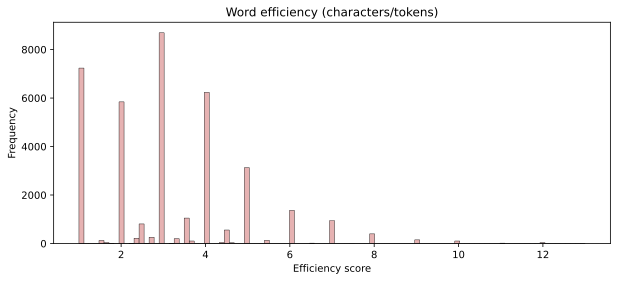

In [19]:
# "efficiency" as characters/tokens
efficiency = tokenCount[:,0]/tokenCount[:,1]

# show a historgram
plt.figure(figsize=(10,4))
plt.hist(efficiency,color=[.9,.7,.7],edgecolor='k',linewidth=.4,bins='fd')
plt.gca().set(xlabel='Efficiency score',ylabel='Frequency',title='Word efficiency (characters/tokens)')
plt.show()

In [20]:
efficiency.shape

(37786,)

In [22]:
# find the most and least efficiently tokenized words
max_efficiency =np.max(efficiency)
min_efficiency = np.min(efficiency)

# find all the words with those efficiency values
most_efficient_words = np.where(efficiency == max_efficiency)[0]
least_efficient_words = np.where(efficiency == min_efficiency)[0]

# find and print the unique words with max-efficiency score
most_efficient_words = list(set([ words[i] for i in most_efficient_words ]))

print('MOST EFFICIENT WORDS:')
for w in most_efficient_words:
  print(f'"{w}" has {max_efficiency} characters per token')


# repeat for min-efficiency score
print('\n\nLEAST EFFICIENT WORDS:')
for w in list(set([ words[i] for i in least_efficient_words ])):
  print(f'"{w}" has {min_efficiency} characters per token')


MOST EFFICIENT WORDS:
"communication" has 13.0 characters per token
"advertisement" has 13.0 characters per token


LEAST EFFICIENT WORDS:
"?" has 1.0 characters per token
"G" has 1.0 characters per token
"…" has 1.0 characters per token
"H" has 1.0 characters per token
";" has 1.0 characters per token
"’" has 1.0 characters per token
"a" has 1.0 characters per token
"”" has 1.0 characters per token
":" has 1.0 characters per token
"!" has 1.0 characters per token
"," has 1.0 characters per token
"XV" has 1.0 characters per token
"_" has 1.0 characters per token
")" has 1.0 characters per token
"D" has 1.0 characters per token
"V" has 1.0 characters per token
"‘I" has 1.0 characters per token
"(" has 1.0 characters per token
"I" has 1.0 characters per token
"“" has 1.0 characters per token
"X" has 1.0 characters per token
"." has 1.0 characters per token
"A" has 1.0 characters per token
"—" has 1.0 characters per token
"]" has 1.0 characters per token


# Exercise 4: Tokens in separated words vs. text

In [24]:
words[:10]

['***',
 'START',
 'OF',
 'THE',
 'PROJECT',
 'GUTENBERG',
 'EBOOK',
 '35',
 '***',
 'The']

In [23]:
# unique set of words as we've split them up
uniqueWords = set(words)
print(f'There are {len(uniqueWords)} unique words in The Time Machine according to our split.')

There are 5007 unique words in The Time Machine according to our split.


In [28]:
import random

In [36]:
# random token
token_idx = random.randint(0, len(uniqueWords))

# non-random tokens to try
# token_idx = 1879#,5030#,716

# find the words (from our split) in The Time Machine that contain that token
words_with_token = [w for w in uniqueWords if token_idx in tokenizer.encode(w)]

# find the context (from the full encoding) surrounding each token appearance
seqs_with_token = np.array(tmTokens)==token_idx

# print the token
print(f'Token {token_idx} is "{tokenizer.decode([token_idx])}"\n\n')

# its occurance in our manually split words
print(f'*** Our manual word split: Token appears {len(words_with_token)} times, including:\n----------------')
for w in words_with_token:
    print(w)


# # its occurances in the GPT encoding
print(f'\n\n*** From encoding the full text: This token appears {sum(seqs_with_token)} times, including:\n----------------')
for s in np.where(seqs_with_token)[0]:
    occurance = tmTokens[s-5:s+5]
    print(tokenizer.decode(occurance))


Token 2744 is " always"


*** Our manual word split: Token appears 0 times, including:
----------------


*** From encoding the full text: This token appears 10 times, including:
----------------
 and Thickness, and is always definable by reference
 and why has
it always been, regarded as
 freely enough,
and men always have done so.
 gone wrong. We are always getting away from the
 all round him;
you always suspected some subtle reserve
 see, I
had always anticipated that the people
 wanted to be with me always. She
tr
ockets. My pockets had always puzzled Weena,
. To me there is always an air of expectation
 entered her head. She always seemed to me,


# Exercise 5: Do more frequent words have fewer tokens?

In [42]:
# the unique words, as a list instead of a set (for indexing)
uniqueWords = list(uniqueWords)
# initialize results vectors
wordFreq = np.zeros(len(uniqueWords),dtype=int)
numTokens = np.zeros(len(uniqueWords),dtype=int)


# loop through all unique words
for i,uword in enumerate(uniqueWords):

  # count the number of times that word appears
  wordFreq[i] = words.count(uword)


  # count the number of tokens in that word
  numTokens[i] = len(tokenizer.encode(uword))


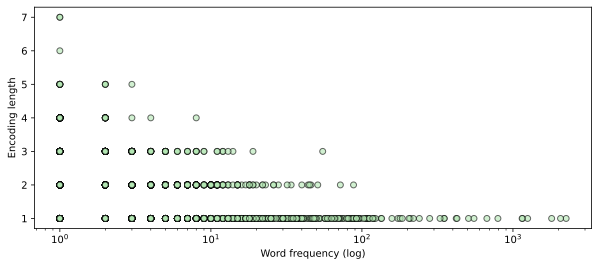

In [43]:
plt.figure(figsize=(10,4))
plt.plot(wordFreq,numTokens,'ko',markerfacecolor=[.7,.9,.7],alpha=.6)
plt.gca().set(xlabel='Word frequency (log)',ylabel='Encoding length',xscale='log')
plt.show()

In [44]:
wordFreqidx = np.argsort(wordFreq)[::-1]
for i in wordFreqidx[:20]:
  print(f'{wordFreq[i]:>5,} appearances of "{uniqueWords[i]}"')

2,250 appearances of ","
2,066 appearances of "the"
1,804 appearances of "."
1,251 appearances of "I"
1,157 appearances of "of"
1,150 appearances of "and"
  795 appearances of "a"
  672 appearances of "to"
  552 appearances of "was"
  508 appearances of "in"
  426 appearances of "my"
  421 appearances of "that"
  351 appearances of "“"
  350 appearances of "had"
  329 appearances of "it"
  281 appearances of "me"
  240 appearances of "as"
  219 appearances of "The"
  209 appearances of "with"
  205 appearances of "at"


# Exercise 6: Fake words from real tokens

In [ ]:
nTokens = .00003 # hmm...

# choose some random tokens
randtokens = np.random.choice

# print the individual tokens
for t in randtokens:
  print(f'Token {t} is "{tokenizer.decode([t])}"')

# fake word without whitespace
fakeword = re.sub

print(f'\nThe fake word is "{fakeword}"')